<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/My_WS02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 02 - Loan Prediction using Decision Tree

In this workshop, we will build a Decision Tree Classifier to predict loan eligibility.  
**Key Steps:**  
1. Data Preprocessing: Handle missing values and encode categorical variables.  
2. Feature Selection: Remove irrelevant attributes (e.g., Loan_ID) and define the target (Loan_Status).  
3. Model Training: Train a Decision Tree using scikit-learn.  
4. Model Evaluation: Evaluate using accuracy, confusion matrix, and classification report.  
5. Model Visualization: Visualize and interpret the trained Decision Tree.




In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [39]:
# ---- Step 1: Load the Dataset ----
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/train_ctrUa4K.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './data/train_ctrUa4K.csv'  # Local path

Mounted at /content/drive


In [40]:
data = pd.read_csv(file_path)

In [41]:
# Displaying dataset info
data.shape

(614, 13)

In [42]:
data.head(12)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [43]:
data.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [45]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [46]:
# ---- Step 2: Handle Missing Values (Fixed) ----

# Fill missing values in numerical columns with their mean
data = data.assign(
    LoanAmount=data['LoanAmount'].fillna(data['LoanAmount'].mean()),
    Loan_Amount_Term=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean()),
    Credit_History=data['Credit_History'].fillna(data['Credit_History'].mode()[0])
)

In [47]:
# Fill missing categorical values with the mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])


In [48]:
# ---- Step 3: Encode Categorical Variables ----
label_enc = LabelEncoder()
for col in categorical_columns + ['Education', 'Property_Area', 'Loan_Status']:
    data[col] = label_enc.fit_transform(data[col])


In [49]:
data.head(12)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [50]:
# Check for remaining missing values
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [51]:
# ---- Step 4: Feature Selection ----
X = data.drop(columns=['Loan_ID', 'Loan_Status'])  # Remove Loan_ID & target variable
y = data['Loan_Status']  # Target variable (Loan Approved: 1, Not Approved: 0)

In [52]:
print("Features:", X.columns.tolist())

Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [53]:
print("Target:", y)

Target: 0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [54]:
# ---- Step 5: Split Data into Training & Testing Sets ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:

# ---- Step 6: Train Decision Tree Classifier ----
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree model trained.")

Decision Tree model trained.


In [56]:
# ---- Step 7: Model Predictions ----
y_pred = dt_classifier.predict(X_test)

In [57]:
# ---- Step 8: Model Evaluation ----
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📌 Model Accuracy: {accuracy:.4f}")


📌 Model Accuracy: 0.7561


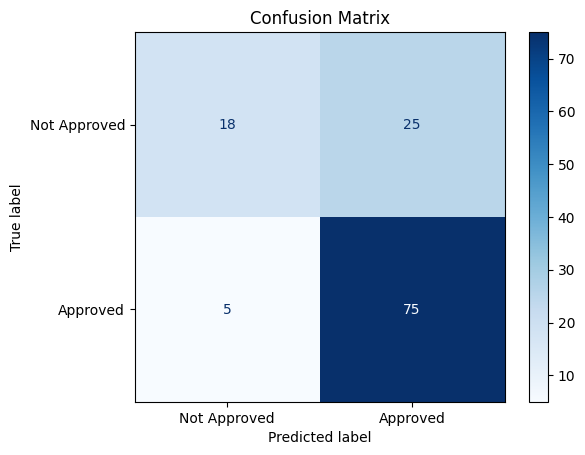

In [58]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [59]:
# Classification Report
print("\n📌 Classification Report:\n")
print(classification_report(y_test, y_pred))


📌 Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



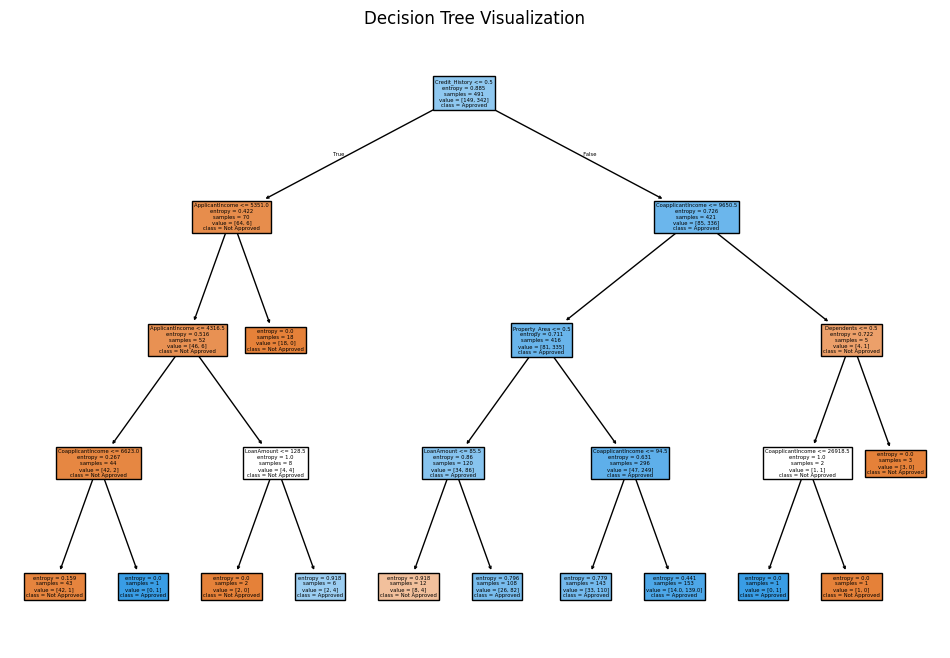

In [60]:
# ---- Step 9: Visualizing Decision Tree ----
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=["Not Approved", "Approved"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## Summary

In this workshop, we:
- Loaded and preprocessed the loan dataset (handling missing values and encoding categorical variables).
- Performed feature selection by removing irrelevant attributes.
- Split the data into training and test sets.
- Trained a Decision Tree Classifier using entropy as the criterion.
- Evaluated the model using accuracy, a confusion matrix, and a classification report.
- Visualised the decision tree to interpret the decision-making process.

This hands-on exercise demonstrates how to apply data analytics and machine learning techniques using Python for predicting loan eligibility.
